In [187]:
import numpy as np
import pandas as pd
import seaborn as sns

import pickle

In [188]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/OnlineRetail.csv' , encoding = 'latin1')
df.shape

(541909, 8)

In [189]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [191]:
df.isnull().mean()

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.002683
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,0.249267
Country,0.000000


Description and CustomerID has missing values

In [192]:
# we have alot of data so removing NaN values
df.dropna(inplace = True)

In [193]:
df.shape

(406829, 8)

In [194]:
df.duplicated().sum()

5225

In [195]:
df.drop_duplicates(inplace = True)

In [196]:
df.shape

(401604, 8)

In [197]:
df['InvoiceNo'].value_counts()

,count
InvoiceNo,
576339,542
579196,533
580727,529
578270,442
573576,435
...,...
C560912,1
560913,1
560917,1


In [198]:
df['StockCode'].value_counts()

,count
StockCode,
85123A,2065
22423,1894
85099B,1659
47566,1409
84879,1405
...,...
90104,1
90135,1
90027D,1


In [199]:
df['Description'].value_counts()

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2058
REGENCY CAKESTAND 3 TIER,1894
JUMBO BAG RED RETROSPOT,1659
PARTY BUNTING,1409
ASSORTED COLOUR BIRD ORNAMENT,1405
...,...
PINK/WHITE GLASS DEMI CHOKER,1
I LOVE LONDON MINI RUCKSACK,1
SET 36 COLOURING PENCILS DOILEY,1


In [200]:
df['CustomerID'].value_counts()

,count
CustomerID,
17841.0,7812
14911.0,5898
14096.0,5128
12748.0,4459
14606.0,2759
...,...
18068.0,1
13256.0,1
15590.0,1


it is very useful column

In [201]:
# changing datatypes

In [202]:
df['InvoiceDate']

,InvoiceDate
0,1/12/2010 8:26
1,1/12/2010 8:26
2,1/12/2010 8:26
3,1/12/2010 8:26
4,1/12/2010 8:26
...,...
541904,9/12/2011 12:50
541905,9/12/2011 12:50
541906,9/12/2011 12:50
541907,9/12/2011 12:50


in this date column their is used somewhere this "13-12-2010 09:02"  and some where "1/12/2010 12:43" so firstly convert this into one format

In [203]:
df['InvoiceDate'] = df['InvoiceDate'].str.replace('-','/')

In [204]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'] , format='%d/%m/%Y %H:%M')

In [205]:
# df['InvoiceDate'] = df['InvoiceDate'].dt.date

In [206]:
df['CustomerID'] = df['CustomerID'].astype('str')

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  object        
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.6+ MB


In [208]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# EDA

In [209]:
df['CustomerID'].describe()

,CustomerID
count,401604
unique,4372
top,17841.0
freq,7812


In [210]:
df['CustomerID'].value_counts()

,count
CustomerID,
17841.0,7812
14911.0,5898
14096.0,5128
12748.0,4459
14606.0,2759
...,...
18068.0,1
13256.0,1
15590.0,1


here 4373 customers data is present

<Axes: xlabel='CustomerID'>

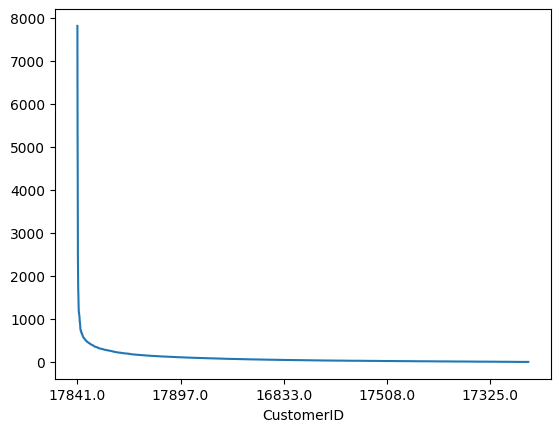

In [211]:
df['CustomerID'].value_counts().plot()

some customer are purchasing too much

In [212]:
df['InvoiceDate'].describe()

,InvoiceDate
count,401604
mean,2011-07-10 12:08:23.848567552
min,2010-12-01 08:26:00
25%,2011-04-06 15:02:00
50%,2011-07-29 15:40:00
75%,2011-10-20 11:58:30
max,2011-12-09 12:50:00


here data is present from 2010-12-01 to 2011-12-09

In [213]:
df['Quantity'].describe()

,Quantity
count,401604.000000
mean,12.183273
std,250.283037
min,-80995.000000
25%,2.000000
50%,5.000000
75%,12.000000
max,80995.000000


In [214]:
df['Quantity'][df['Quantity'] < 2].value_counts()

,count
Quantity,
1,69605
-1,3828
-2,1326
-3,576
-12,517
...,...
-701,1
-252,1
-334,1


In [215]:
df['Quantity'][df['Quantity'] > 12].value_counts().sort_index().tail(50)

,count
Quantity,
992,1
1000,10
1008,4
1010,1
1020,1
1056,2
1120,1
1152,7
1200,18


In [216]:
df['CustomerID'].nunique()

4372

In [217]:
df[df['Quantity'] < 1000 ]['CustomerID'].nunique()

4366

Quantity column has a major issue like their is some values are negative and some of are too much ,  
so i am converting negative values into positive and keeping only orders less then 1000 quantity , to reduce outlier (after that also outlier is present)

In [218]:
def neg_to_pos(x):
  if x < 0 :
    return -x
  else :
    return x

In [219]:
neg_to_pos(-10)

10

In [220]:
df['Quantity'] = df['Quantity'].apply(neg_to_pos)

In [221]:
df['Quantity'].describe()

,Quantity
count,401604.000000
mean,13.542995
std,250.213145
min,1.000000
25%,2.000000
50%,6.000000
75%,12.000000
max,80995.000000


<Axes: ylabel='Quantity'>

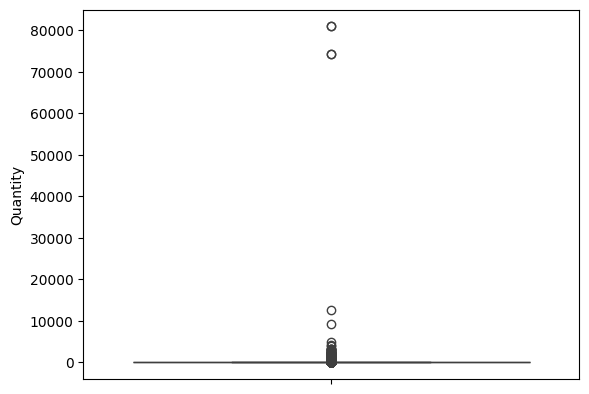

In [222]:
sns.boxplot(df['Quantity'])

Here too values are outlier so doing treatment of this outlier by using IQR method

In [223]:
q25 = df['Quantity'].quantile(0.25)
q75 = df['Quantity'].quantile(0.75)

IQR = q75 - q25

lower_limit = q25 - 1.5 * IQR
upper_limit = q75 + 1.5 * IQR

print(f'Upper limit : {upper_limit} \nLower limit : {lower_limit}')

Upper limit : 27.0 
Lower limit : -13.0


no need to filter on lower limit because their no -ve numbers so filter only upper limit

<Axes: ylabel='Quantity'>

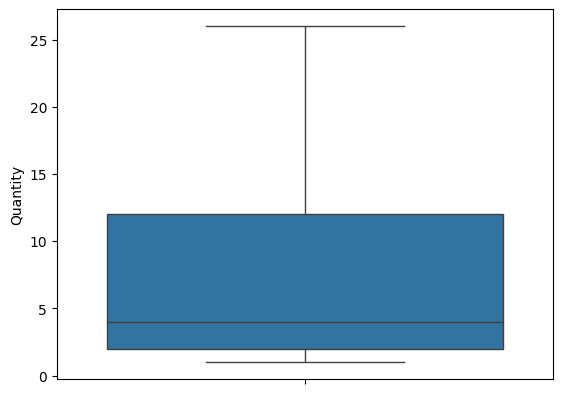

In [224]:
df = df[df['Quantity'] < upper_limit]
sns.boxplot(df['Quantity'])

it looks nice

In [225]:
df['UnitPrice'].describe()

,UnitPrice
count,375397.000000
mean,3.611966
std,72.147298
min,0.000000
25%,1.250000
50%,1.950000
75%,3.750000
max,38970.000000


In [226]:
df['UnitPrice'][df['UnitPrice'] > 3.75].sort_values(ascending = False).head(50)

,UnitPrice
222681,38970.00
173277,8142.75
173382,8142.75
173391,6930.00
268027,4287.63
422351,4161.06
422376,4161.06
422375,4161.06
406406,3949.32
406404,3949.32


unitprice columns some price are 0 and this is left skewed

In [227]:
df['UnitPrice'][df['UnitPrice'] == 0.00]

,UnitPrice
9302,0.0
33576,0.0
40089,0.0
47068,0.0
47070,0.0
56674,0.0
86789,0.0
139453,0.0
145208,0.0
157042,0.0


Removing those rows that have 0.00 price

In [228]:
df = df[df['UnitPrice'] > 0.00]

<Axes: ylabel='UnitPrice'>

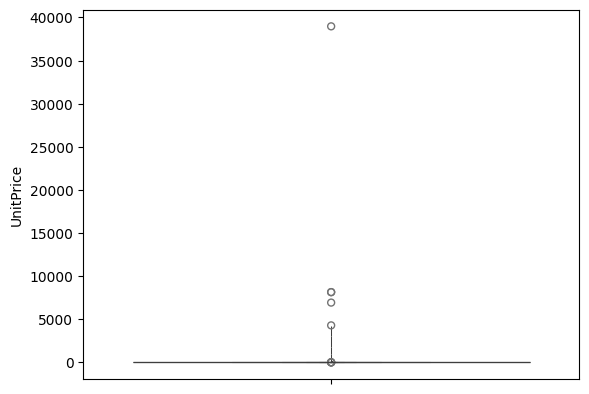

In [229]:
sns.boxenplot(df['UnitPrice'])

In [230]:
q25 = df['UnitPrice'].quantile(0.25)
q75 = df['UnitPrice'].quantile(0.75)

IQR = q75 - q25

lower_limit = q25 - 1.5 * IQR
upper_limit = q75 + 1.5 * IQR

print(f'Upper limit : {upper_limit} \nLower limit : {lower_limit}')

Upper limit : 7.5 
Lower limit : -2.5


here no -ve prices so only filter with upper limit but their is some outlier still their so i am using 5.5 (value taken from boxplot)


<Axes: ylabel='UnitPrice'>

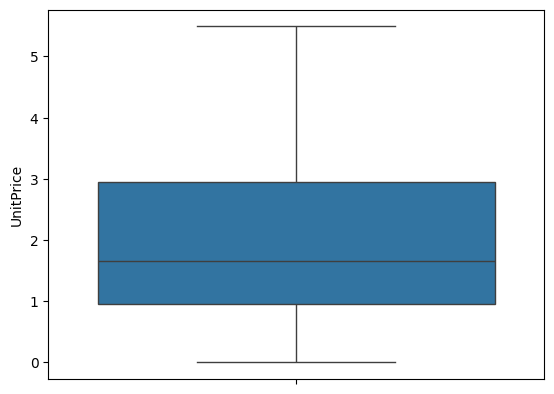

In [231]:
df = df[df['UnitPrice'] < 5.5]

sns.boxplot(df['UnitPrice'])

In [232]:
df['AmountSpent'] = df['Quantity'] * df['UnitPrice']

In [233]:
freq_table = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
freq_table.rename(columns = {'InvoiceNo' : 'frequency'} , inplace = True)
freq_table

,CustomerID,frequency
0,12347.0,164
1,12348.0,6
2,12349.0,53
3,12350.0,16
4,12352.0,66
...,...,...
4204,18280.0,7
4205,18281.0,5
4206,18282.0,8
4207,18283.0,715


In [234]:
new_df = pd.merge (df , freq_table ,how = 'inner', on = 'CustomerID')[['CustomerID' ,'InvoiceDate','Country', 'Quantity' ,'UnitPrice' ,'AmountSpent' , 'frequency']]
new_df.shape

(324165, 7)

In [235]:
new_df['monthName'] = new_df['InvoiceDate'].dt.month_name()
new_df['DayName'] = new_df['InvoiceDate'].dt.day_name()

In [236]:
new_df['AmountSpent'].describe()

,AmountSpent
count,324165.000000
mean,12.282624
std,12.009366
min,0.001000
25%,3.750000
50%,9.960000
75%,17.000000
max,141.700000


<Axes: ylabel='AmountSpent'>

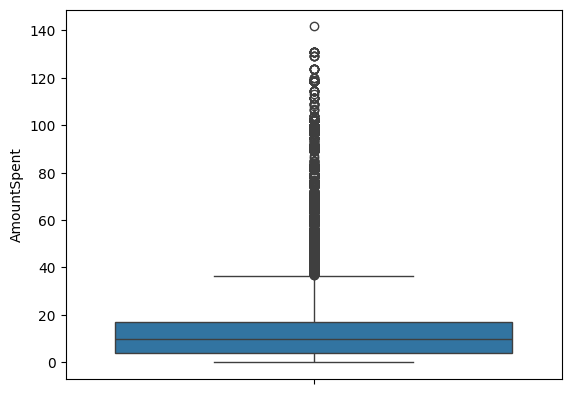

In [237]:
sns.boxplot(new_df['AmountSpent'])

In [238]:
q25 = new_df['AmountSpent'].quantile(0.25)
q75 = new_df['AmountSpent'].quantile(0.75)

IQR = q75 - q25

lower_limit = q25 - 1.5 * IQR
upper_limit = q75 + 1.5 * IQR

print(f'Upper limit : {upper_limit} \nLower limit : {lower_limit}')

Upper limit : 36.875 
Lower limit : -16.125


<Axes: ylabel='AmountSpent'>

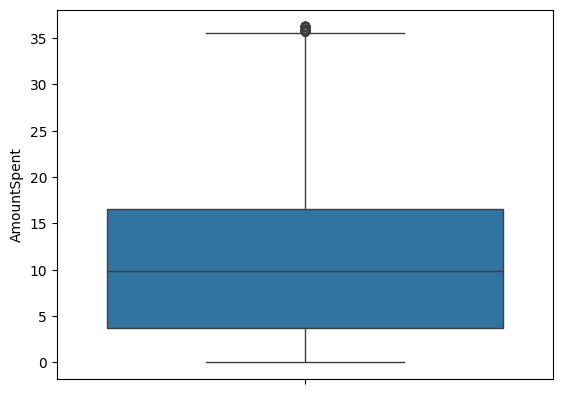

In [239]:
new_df = new_df[new_df['AmountSpent'] < upper_limit]
sns.boxplot(new_df['AmountSpent'])

<Axes: ylabel='frequency'>

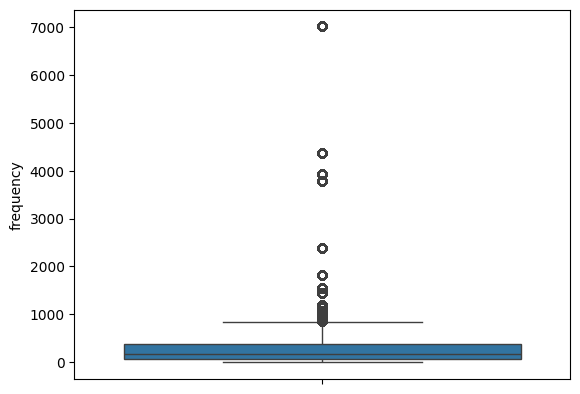

In [240]:
sns.boxplot(new_df['frequency'])

In [241]:
q25 = new_df['frequency'].quantile(0.25)
q75 = new_df['frequency'].quantile(0.75)

IQR = q75 - q25

lower_limit = q25 - 1.5 * IQR
upper_limit = q75 + 1.5 * IQR

print(f'Upper limit : {upper_limit} \nLower limit : {lower_limit}')

Upper limit : 857.0 
Lower limit : -391.0


<Axes: ylabel='frequency'>

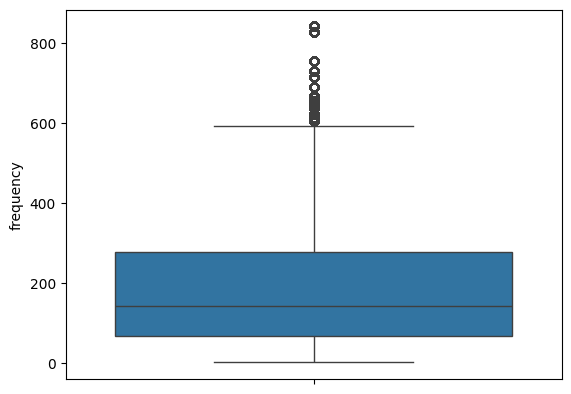

In [242]:
new_df = new_df[new_df['frequency'] <  upper_limit]
sns.boxplot(new_df['frequency'])

<Axes: ylabel='monthName'>

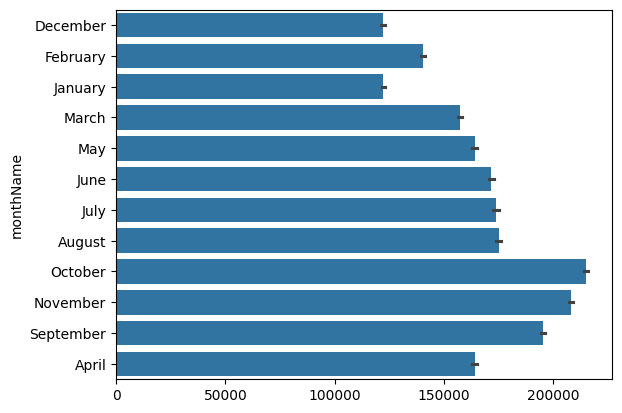

In [243]:
sns.barplot(new_df['monthName'])

<Axes: ylabel='DayName'>

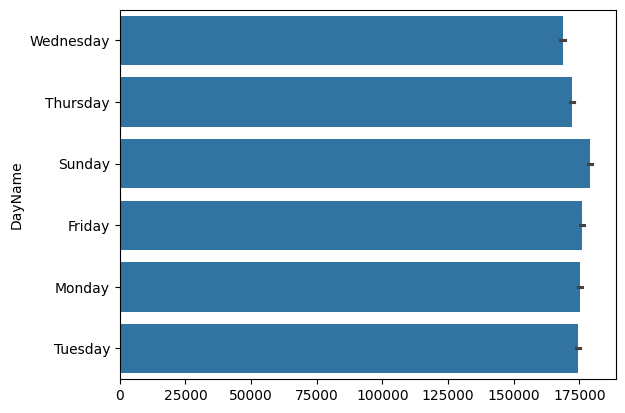

In [244]:
sns.barplot(new_df['DayName'])

<Axes: ylabel='Country'>

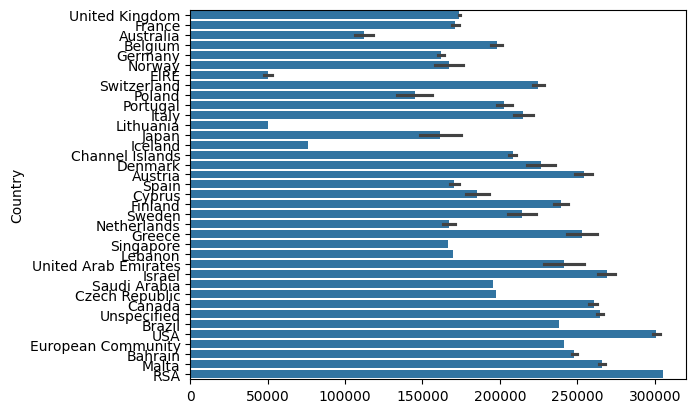

In [245]:
sns.barplot(new_df['Country'])

In [246]:
new_df.head()

,CustomerID,InvoiceDate,Country,Quantity,UnitPrice,AmountSpent,frequency,monthName,DayName
0,17850.0,2010-12-01 08:26:00,United Kingdom,6,2.55,15.30,271,December,Wednesday
1,17850.0,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,271,December,Wednesday
2,17850.0,2010-12-01 08:26:00,United Kingdom,8,2.75,22.00,271,December,Wednesday
3,17850.0,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,271,December,Wednesday
4,17850.0,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,271,December,Wednesday


In [247]:
new_df.shape

(274281, 9)

In [249]:
pickle.dump(new_df , open('new_df.pkl', 'wb'))